In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

### Load data

In [23]:
plt.style.use("default")
train = pd.read_csv('train.csv').drop(['id'], axis = 1)
test = pd.read_csv('test.csv').drop(['id'], axis = 1)
train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,74.0,...,49.0,114.0,15.4,1.0,0.9,20.0,23.0,13.0,0.0,0.0
1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,84.0,...,51.0,111.0,16.2,1.0,0.9,30.0,39.0,92.0,0.0,1.0
2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,80.0,...,52.0,112.0,14.6,2.0,0.9,20.0,20.0,50.0,0.0,1.0
3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,79.0,...,61.0,119.0,13.4,1.0,0.8,25.0,20.0,18.0,0.0,0.0
4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,76.0,...,61.0,120.0,13.9,1.0,0.7,20.0,26.0,10.0,0.0,0.0


<img src="https://www.sunderlandecho.com/webimg/b25lY21zOjdhNGU1YmQxLWZjYmUtNDE1Zi05ZTVjLTk1OTUzZjA0NGJiZDo5OTJjOTRmZC1lYjI3LTQ0MWQtYjU1YS01NDllNDEwNWI2NDI=.jpg?crop=3:2,smart&trim=&width=990&quality=65&enable=upscale" alt="Description of the image" width="700"/>


In [24]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

### Features with description

| Feature                | Description                                                                                 |
|------------------------|---------------------------------------------------------------------------------------------|
| **age**                | Age of the individual (years)                                                               |
| **height(cm)**         | Height of the individual in centimeters                                                     |
| **weight(kg)**         | Weight of the individual in kilograms                                                       |
| **waist(cm)**          | Waist circumference of the individual in centimeters                                        |
| **eyesight(left)**     | Vision quality of the left eye                                                              |
| **eyesight(right)**    | Vision quality of the right eye                                                             |
| **hearing(left)**      | Hearing ability of the left ear                                                             |
| **hearing(right)**     | Hearing ability of the right ear                                                            |
| **systolic**           | Systolic blood pressure measurement (mmHg)                                                  |
| **relaxation**         | Diastolic blood pressure measurement (mmHg)                                                 |
| **fasting blood sugar**| Fasting blood sugar level (mg/dL)                                                           |
| **Cholesterol**        | Total cholesterol level in the blood (mg/dL)                                                |
| **triglyceride**       | Triglyceride level in the blood (mg/dL)                                                     |
| **HDL**                | High-density lipoprotein cholesterol level (mg/dL)                                          |
| **LDL**                | Low-density lipoprotein cholesterol level (mg/dL)                                           |
| **hemoglobin**         | Hemoglobin level in the blood (g/dL)                                                        |
| **Urine protein**      | Presence of protein in urine, indicating possible kidney issues                             |
| **serum creatinine**   | Creatinine level in serum, used to assess kidney function (mg/dL)                           |
| **AST**                | Aspartate aminotransferase enzyme level, associated with liver health                       |
| **ALT**                | Alanine aminotransferase enzyme level, associated with liver health                         |
| **Gtp**                | Gamma-glutamyl transferase level, another liver enzyme (mg/dL)                              |
| **dental caries**      | Indicator of dental caries (cavities)                                                       |
| **smoking**            | Target variable; indicates if the individual smokes (1 for smoking, 0 for non-smoking)      |
| **BMI**                | Body Mass Index, calculated as weight (kg) / (height (m)^2)                                 |
| **HW_Ratio**           | Ratio of height to weight, an alternative metric related to body composition                |
| **HA_Ratio**           | Ratio of height to age, capturing growth patterns                                          |
| **hemoglobin_height**  | Combined feature of hemoglobin level adjusted for height                                    |
| **hemoglobin / Gtp**   | Ratio of hemoglobin to Gtp, possibly relevant for liver health assessments                  |
| **cholesterol_ratio**  | Ratio of LDL to HDL cholesterol, an indicator of heart health                               |
| **blood_pressure_category** | Categorical feature assigning blood pressure ranges (e.g., normal, elevated, high)     |
| **waist_height_ratio** | Ratio of waist circumference to height, associated with body fat distribution               |
| **Liver_Enzyme_Ratio** | Ratio of AST to ALT levels, used in liver function evaluation                               |


### Statistics of train data

In [25]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,15000.0,42.659667,10.514524,20.0,40.0,40.0,50.0,85.0
height(cm),15000.0,164.669333,8.524211,140.0,160.0,165.0,170.0,190.0
weight(kg),15000.0,64.235333,10.999092,40.0,55.0,65.0,70.0,120.0
waist(cm),15000.0,80.251100,7.927326,1.0,75.0,80.0,86.0,117.0
eyesight(left),15000.0,1.034373,0.304866,0.1,0.9,1.0,1.2,9.9
eyesight(right),15000.0,1.029453,0.302373,0.1,0.8,1.0,1.2,9.9
hearing(left),15000.0,1.005600,0.074626,1.0,1.0,1.0,1.0,2.0
hearing(right),15000.0,1.006000,0.077230,1.0,1.0,1.0,1.0,2.0
systolic,15000.0,119.219133,11.151900,84.0,110.0,119.0,128.0,199.0
relaxation,15000.0,74.963667,7.956559,42.0,70.0,75.0,80.0,122.0


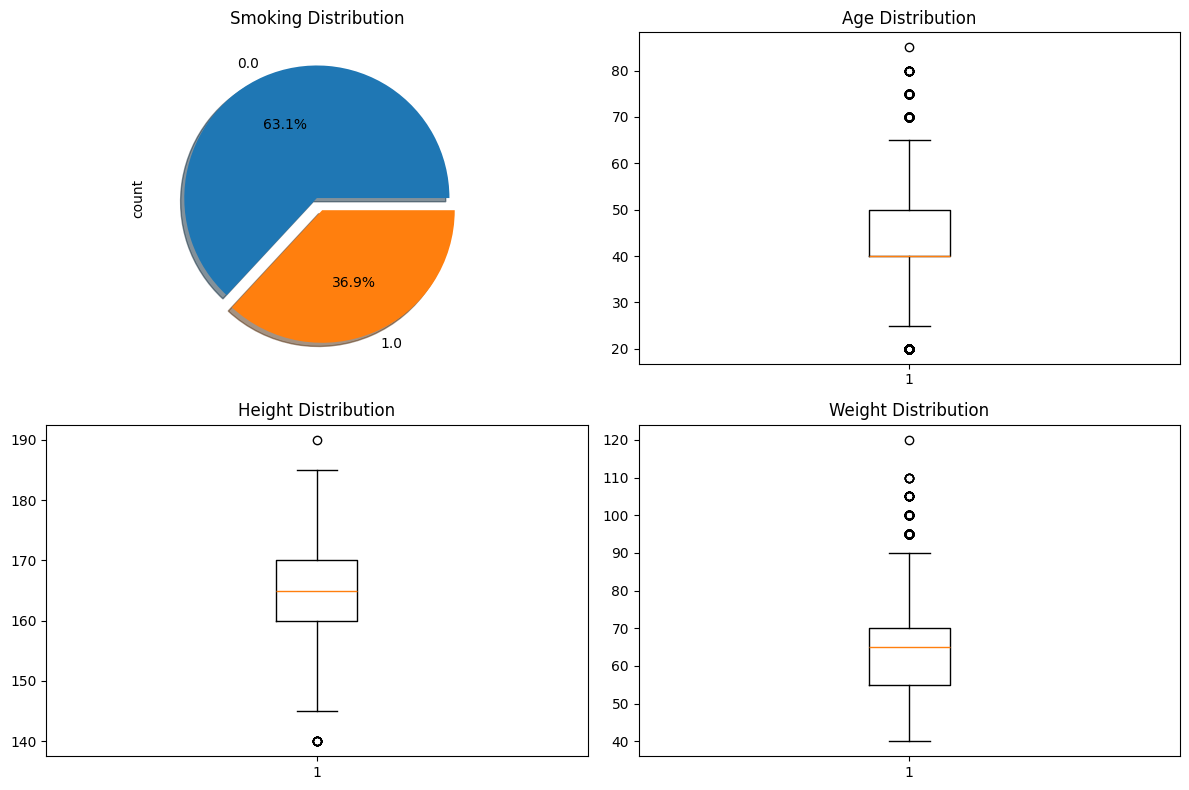

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

train['smoking'].value_counts().plot.pie(
    ax=axes[0, 0], 
    explode=[0, 0.1], 
    autopct='%1.1f%%', 
    shadow=True
)
axes[0, 0].set_title('Smoking Distribution')

axes[0, 1].boxplot(train["age"])
axes[0, 1].set_title('Age Distribution')

axes[1, 0].boxplot(train["height(cm)"])
axes[1, 0].set_title('Height Distribution')

axes[1, 1].boxplot(train["weight(kg)"])
axes[1, 1].set_title('Weight Distribution')

plt.tight_layout()
plt.show()


In [27]:
train.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   height(cm)           15000 non-null  float64
 2   weight(kg)           15000 non-null  float64
 3   waist(cm)            15000 non-null  float64
 4   eyesight(left)       15000 non-null  float64
 5   eyesight(right)      15000 non-null  float64
 6   hearing(left)        15000 non-null  float64
 7   hearing(right)       15000 non-null  float64
 8   systolic             15000 non-null  float64
 9   relaxation           15000 non-null  float64
 10  fasting blood sugar  15000 non-null  float64
 11  Cholesterol          15000 non-null  float64
 12  triglyceride         15000 non-null  float64
 13  HDL                  15000 non-null  float64
 14  LDL                  15000 non-null  float64
 15  hemoglobin           15000 non-null 

### WoE

In [28]:
# numeric_columns = ['age', 'cholesterol_ratio']
# woe_mappings = {}

# def calculate_woe_train(data, column, target, bins=5):
#     data[f'{column}_bin'] = pd.cut(data[column], bins=bins)
    
#     # Calculate WoE table
#     woe_table = data.groupby(f'{column}_bin').apply(
#         lambda x: pd.Series({
#             'non_smokers': (x[target] == 0).sum(),
#             'smokers': (x[target] == 1).sum()
#         })
#     ).reset_index()

#     # Avoid division by zero
#     woe_table['non_smokers'] = woe_table['non_smokers'].replace(0, 0.5)
#     woe_table['smokers'] = woe_table['smokers'].replace(0, 0.5)

#     total_non_smokers = (data[target] == 0).sum()
#     total_smokers = (data[target] == 1).sum()

#     woe_table['WoE'] = np.log((woe_table['smokers'] / total_smokers) / (woe_table['non_smokers'] / total_non_smokers))
    
#     # Store WoE mapping
#     woe_dict = dict(zip(woe_table[f'{column}_bin'], woe_table['WoE']))
#     woe_mappings[column] = woe_dict
    
#     # Apply to training data
#     data[f'{column}_woe'] = data[f'{column}_bin'].map(woe_dict)
#     data.drop(columns=[f'{column}_bin'], inplace=True)
    
#     return data

# # Apply WoE calculation on `train`
# for col in numeric_columns:
#     train = calculate_woe_train(train, col, 'smoking', bins=5)


### Feature engineering

In [29]:
def create_features(df):
    df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)
    df['HW_Ratio'] = df['height(cm)'] / df['waist(cm)']
    df['HA_Ratio'] = df['height(cm)'] / df['age'] 
    df["hemoglobin_height"] = df["hemoglobin"] * df["height(cm)"]
    df["hemoglobin / Gtp"] = df["hemoglobin"] / df["Gtp"] 
    df['cholesterol_ratio'] = df['HDL'] / df['LDL']
    df['blood_pressure_category'] = pd.cut(df['systolic'], bins=[0, 120, 140, np.inf], labels = [0, 1, 2])
    df['waist_height_ratio'] = df['waist(cm)'] / df['height(cm)']
    df['Liver_Enzyme_Ratio'] = df['AST'] / df['ALT'] # ----> improved in public decreased in private
    
    return df

create_features(test).head()
create_features(train).head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,smoking,BMI,HW_Ratio,HA_Ratio,hemoglobin_height,hemoglobin / Gtp,cholesterol_ratio,blood_pressure_category,waist_height_ratio,Liver_Enzyme_Ratio
0,55.0,170.0,80.0,92.0,1.2,0.8,1.0,1.0,129.0,74.0,...,0.0,27.681661,1.847826,3.090909,2618.0,1.184615,0.429825,1,0.541176,0.869565
1,30.0,170.0,80.0,94.0,1.5,1.5,1.0,1.0,128.0,84.0,...,1.0,27.681661,1.808511,5.666667,2754.0,0.176087,0.459459,1,0.552941,0.769231
2,45.0,170.0,75.0,84.0,1.0,1.0,1.0,1.0,124.0,80.0,...,1.0,25.951557,2.023810,3.777778,2482.0,0.292000,0.464286,1,0.494118,1.000000
3,55.0,150.0,55.0,85.0,0.9,0.5,1.0,1.0,123.0,79.0,...,0.0,24.444444,1.764706,2.727273,2010.0,0.744444,0.512605,1,0.566667,1.250000
4,45.0,160.0,55.0,72.0,0.5,0.6,1.0,1.0,117.0,76.0,...,0.0,21.484375,2.222222,3.555556,2224.0,1.390000,0.508333,0,0.450000,0.769231


### Categorizing

In [30]:
# from sklearn.preprocessing import OrdinalEncoder

# def create_and_encode_categories(df):
#     # Initialize the OrdinalEncoder
#     ordinal_encoder = OrdinalEncoder()

#     # 1. Age_Cat: Create quantile-based categories for age and encode
#     df['Age_Cat'] = pd.qcut(df['age'], q=5)
#     df['Age_Cat'] = ordinal_encoder.fit_transform(df[['Age_Cat']])

#     # 2. Waist_Cat: Create quantile-based categories for waist(cm) and encode
#     df['Waist_Cat'] = pd.qcut(df['waist(cm)'], q=5)
#     df['Waist_Cat'] = ordinal_encoder.fit_transform(df[['Waist_Cat']])

#     # 3. Cholesterol_Cat: Create bins for Cholesterol and encode
#     df['Cholesterol_Cat'] = pd.cut(df['Cholesterol'], bins=[107, 200, 296])
#     df['Cholesterol_Cat'] = ordinal_encoder.fit_transform(df[['Cholesterol_Cat']])

#     # 4. Triglyceride_Cat: Create quantile-based categories for triglyceride and encode
#     df['triglyceride_Cat'] = pd.qcut(df['triglyceride'], q=5)
#     df['triglyceride_Cat'] = ordinal_encoder.fit_transform(df[['triglyceride_Cat']])

#     return df

# train = create_and_encode_categories(train)
# test = create_and_encode_categories(test)

### Target and data

In [31]:
X = train.drop(['smoking'], axis = 1)
y = train['smoking']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Optuna tuning

In [32]:
import optuna
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Logistic Regression pipeline with polynomial features of degree 2, scaling, and logistic regression
logistic_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=500, random_state=42, n_jobs=-1))
])

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 4, 32)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000, step=10)
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])

    stacking_model = StackingClassifier(
        estimators=[
            ('logistic', logistic_pipeline)
        ],
        final_estimator=RandomForestClassifier(
            max_depth=max_depth,
            criterion=criterion,
            n_estimators=n_estimators,
            n_jobs=-1,
            random_state=42
        ),
        passthrough=True,
        n_jobs=-1,
        cv=5
    )

    stacking_model.fit(X_train, y_train)
    pred_proba = stacking_model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, pred_proba)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)

print("Best parameters:", study.best_params)
print("Best ROC AUC score:", study.best_value)

# Visualization of the optimization
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_param_importances(study)

[I 2024-10-29 03:07:57,359] A new study created in memory with name: no-name-3da38935-2df8-4660-9f7a-b295d8dce8cb
[I 2024-10-29 03:08:20,658] Trial 0 finished with value: 0.8863199747901872 and parameters: {'max_depth': 7, 'n_estimators': 160, 'criterion': 'entropy'}. Best is trial 0 with value: 0.8863199747901872.
[I 2024-10-29 03:08:44,276] Trial 1 finished with value: 0.8882519994153146 and parameters: {'max_depth': 16, 'n_estimators': 620, 'criterion': 'gini'}. Best is trial 1 with value: 0.8882519994153146.
[I 2024-10-29 03:09:12,348] Trial 2 finished with value: 0.8889811951501483 and parameters: {'max_depth': 28, 'n_estimators': 980, 'criterion': 'entropy'}. Best is trial 2 with value: 0.8889811951501483.
[I 2024-10-29 03:09:39,168] Trial 3 finished with value: 0.888898855117611 and parameters: {'max_depth': 22, 'n_estimators': 840, 'criterion': 'log_loss'}. Best is trial 2 with value: 0.8889811951501483.
[I 2024-10-29 03:09:59,370] Trial 4 finished with value: 0.887445921344624

Best parameters: {'max_depth': 14, 'n_estimators': 910, 'criterion': 'log_loss'}
Best ROC AUC score: 0.8894147260995598


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'cliponaxis': False,
              'hovertemplate': [criterion (CategoricalDistribution):
                                0.03758959199837121<extra></extra>, n_estimators
                                (IntDistribution):
                                0.19378500344599814<extra></extra>, max_depth
                                (IntDistribution):
                                0.7686254045556307<extra></extra>],
              'name': 'Objective Value',
              'orientation': 'h',
              'text': [0.04, 0.19, 0.77],
              'textposition': 'outside',
              'type': 'bar',
              'x': [0.03758959199837121, 0.19378500344599814, 0.7686254045556307],
              'y': [criterion, n_estimators, max_depth]}],
    'layout': {'template': '...',
               'title': {'text': 'Hyperparameter Importances'},
               'xaxis': {'title': {'text': 'Hyperparameter Importance'}},
               'yaxis': {'title': {'text': 'Hyperparameter'}}}
})

### Ensamble model

In [33]:
logistic_pipeline = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=500, random_state=42, n_jobs=-1))
])

stacking_model = StackingClassifier(
    estimators=[
        ('logistic', logistic_pipeline)         
    ],
    final_estimator=RandomForestClassifier(
        max_depth=13, 
        criterion='log_loss', 
        n_jobs=-1, 
        random_state=42, 
        n_estimators=500,
    ),
    passthrough=True,
    n_jobs=-1,
    cv=5
)

stacking_model.fit(X_train, y_train)

pred_proba = stacking_model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8888831939010476


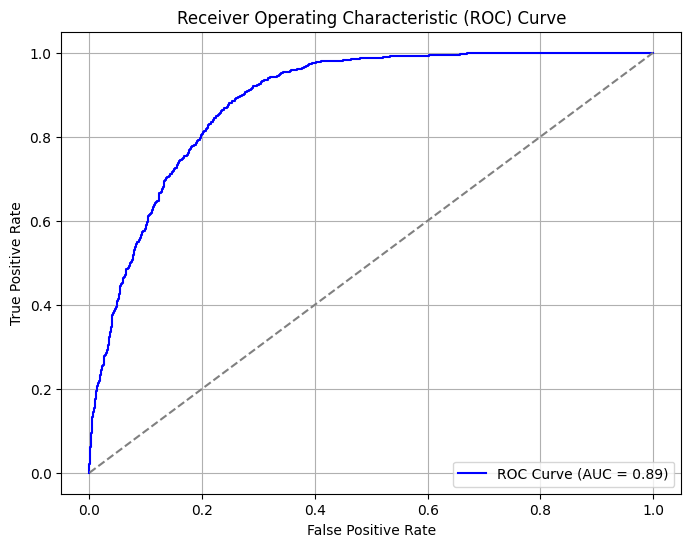

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)
roc_auc = roc_auc_score(y_test, pred_proba)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random model
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Feature importance

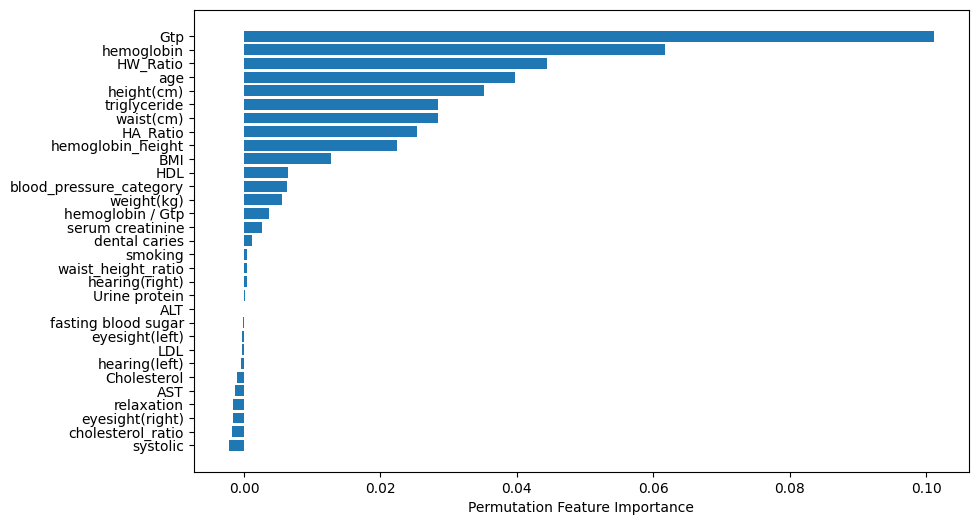

In [35]:
from sklearn.inspection import permutation_importance

# Assuming your stacking model is `stack_model`
perm_importance = permutation_importance(stacking_model, X_test, y_test, n_repeats=10, random_state=0)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Feature Importance")
plt.show()

### Leaerning curve

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import learning_curve

scorer = make_scorer(roc_auc_score, needs_proba=True)

train_sizes, train_scores, val_scores = learning_curve(
    stacking_model, X, y, cv=5, scoring=scorer, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.plot(train_sizes, val_mean, 'o-', color="orange", label="Validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="orange", alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("ROC-AUC Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

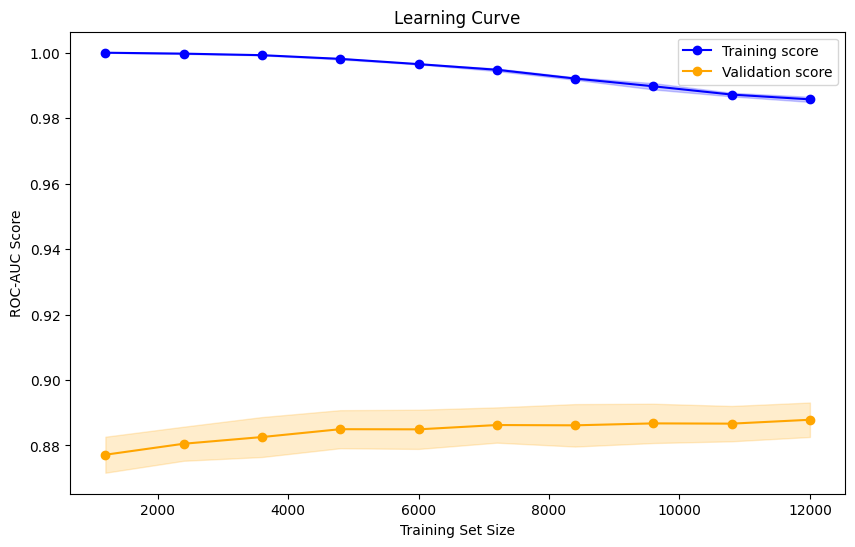

### Cross Validation

In [17]:
cv_scores = cross_val_score(stacking_model, X, y, cv = 10, scoring = 'roc_auc', n_jobs = -1)
print("Cross-Validation ROC-AUC Scores:", cv_scores)
print("Mean ROC-AUC Score CV:", cv_scores.mean())

Cross-Validation ROC-AUC Scores: [0.8893947  0.89976914 0.88706508 0.89076369 0.89122545 0.89600522
 0.88075576 0.88168691 0.87787454 0.88918379]
Mean ROC-AUC Score CV: 0.8883724284591883


### StratifiedKFold CV

In [21]:
from sklearn.model_selection import StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X_array = np.array(X)
y_array = np.array(y)
# Store fold ROC AUC scores
roc_auc_scores = []

# Loop over each fold
for train_index, val_index in skf.split(X, y):
    X_train, X_val = X_array[train_index], X_array[val_index]
    y_train, y_val = y_array[train_index], y_array[val_index]
    
    # Fit stacking model on the train fold
    stacking_model.fit(X_train, y_train)
    
    # Predict probabilities and calculate ROC AUC on the validation fold
    y_pred_proba = stacking_model.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    
    print(f'Fold ROC AUC: {roc_auc:.4f}')

# Overall ROC AUC across folds
mean_roc_auc = np.mean(roc_auc_scores)
print(f'\nMean ROC AUC across {n_splits} folds: {mean_roc_auc:.4f}')

Fold ROC AUC: 0.8796
Fold ROC AUC: 0.8895
Fold ROC AUC: 0.8797
Fold ROC AUC: 0.8969
Fold ROC AUC: 0.8877

Mean ROC AUC across 5 folds: 0.8867


### Fit model

In [17]:
stacking_model.fit(X, y)
pred = stacking_model.predict_proba(X_test)[:,1]
ras = roc_auc_score(y_test, pred)
print('X, y ROC-AUC:', ras)

X, y ROC-AUC: 0.983241549112626


### To csv

In [18]:

sub = pd.read_csv('sample_submission.csv')
sub["smoking"] = stacking_model.predict_proba(test)[:,1]
sub.to_csv("submission_best.csv", index = False)